In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
#import datasets
train_df = pd.read_csv("Neighbor_feautures_train.csv")
test_df = pd.read_csv("Neighbor_feautures_test.csv")

In [5]:
y_train = train_df["y"]
x_train = train_df.drop("y", axis=1)
y_test = test_df["y"]
x_test = test_df.drop("y", axis=1)

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('decision_tree', RandomForestClassifier())], 
    verbose = True)

In [10]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=  11.3s


Pipeline(steps=[('scaler', StandardScaler()),
                ('decision_tree', RandomForestClassifier())],
         verbose=True)

Text(0.5, 0, 'Random Forest Feature Importance')

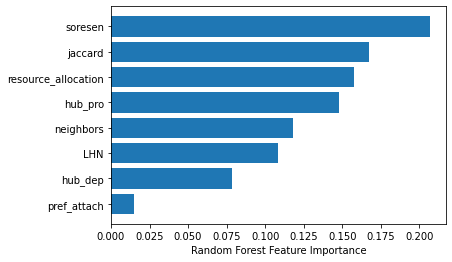

In [11]:
sorted_idx = pipeline["decision_tree"].feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], pipeline["decision_tree"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [12]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.958785223201317
